# Filtrado de datos

## Leo el archivo csv de la computadora.

In [1]:
import pandas as p
import datetime as dt
#Con la siguiente linea consigo poner todos los datos en data, la cual pasa a ser un dataframe, que es en lo que se basa pandas.
data = p.read_csv(r"C:\Users\ing_l\Desktop\Facultad\Tesis\Data\Data 1\BD_Parking.csv", delimiter=',')

In [2]:
print(data)

        id_cuadra operacion  patente   tarjeta       fecha      hora
0              82   Entrada   BVQ775  10037637  2018-01-01  07:11:00
1              40   Entrada   DCN224  10059452  2018-01-01  11:26:00
2              61   Entrada   ATE568  10032179  2018-01-01  13:09:00
3              34   Entrada   LPV400  10026609  2018-01-01  16:53:00
4              66   Entrada   FMR105  10073847  2018-01-01  17:25:00
5              16   Entrada   FCR161  10012270  2018-01-01  18:11:00
6              34   Entrada   GJQ120  10124912  2018-01-01  18:38:00
7              12   Entrada   FKE897  10161964  2018-01-01  19:47:00
8              47   Entrada   FCE602  10136782  2018-01-01  21:05:00
9              47   Entrada   FCE602  10136782  2018-01-01  21:06:00
10              3   Entrada   EMO149  10005465  2018-01-01  22:31:00
11             22   Entrada   GZA980  10122196  2018-01-02  02:16:00
12             59   Entrada  AB513HD  10001621  2018-01-02  07:21:00
13              4   Entrada   HAZ1

## Agarro solo las columnas de id_cuadra, fecha y hora.

## Y solamente me quedo con las operaciones que son de entrada (para no tener duplicidad de datos)

In [3]:
#Agrupo los elementos por id_cuadra y fecha, para luego ver un promedio de los usuarios que se estacionan en cada cuadra por cada dia de la semana

#processedData = data.groupby(["id_cuadra","fecha"]).size().to_frame('Cantidad estacionados').reset_index()
reducedData = data.loc[data.operacion == 'Entrada', ['id_cuadra','fecha','hora']]
print(reducedData)

        id_cuadra       fecha      hora
0              82  2018-01-01  07:11:00
1              40  2018-01-01  11:26:00
2              61  2018-01-01  13:09:00
3              34  2018-01-01  16:53:00
4              66  2018-01-01  17:25:00
5              16  2018-01-01  18:11:00
6              34  2018-01-01  18:38:00
7              12  2018-01-01  19:47:00
8              47  2018-01-01  21:05:00
9              47  2018-01-01  21:06:00
10              3  2018-01-01  22:31:00
11             22  2018-01-02  02:16:00
12             59  2018-01-02  07:21:00
13              4  2018-01-02  07:46:00
14              2  2018-01-02  07:49:00
15             78  2018-01-02  08:03:00
16              2  2018-01-02  08:18:00
17             56  2018-01-02  08:22:00
18             56  2018-01-02  08:23:00
19              2  2018-01-02  08:27:00
20             12  2018-01-02  08:30:00
21              2  2018-01-02  08:31:00
22              5  2018-01-02  08:35:00
23             90  2018-01-02  08:39:00


In [4]:
print(reducedData.hora)

0         07:11:00
1         11:26:00
2         13:09:00
3         16:53:00
4         17:25:00
5         18:11:00
6         18:38:00
7         19:47:00
8         21:05:00
9         21:06:00
10        22:31:00
11        02:16:00
12        07:21:00
13        07:46:00
14        07:49:00
15        08:03:00
16        08:18:00
17        08:22:00
18        08:23:00
19        08:27:00
20        08:30:00
21        08:31:00
22        08:35:00
23        08:39:00
24        08:41:00
25        08:43:00
26        08:44:00
27        08:46:00
28        08:46:00
29        08:46:00
            ...   
351434    10:15:00
351435    10:17:00
351436    10:17:00
351437    10:16:00
351438    10:18:00
351439    10:18:00
351440    10:18:00
351441    10:18:00
351442    10:18:00
351443    10:18:00
351444    10:20:00
351445    10:20:00
351446    10:20:00
351447    10:20:00
351448    10:20:00
351449    10:20:00
351450    10:20:00
351451    10:21:00
351452    10:21:00
351453    10:21:00
351454    10:21:00
351455    10

## to_datetime transforma un string a un tipo datetime, para asi despues poder agarrar la hora

In [5]:
#Para que no tire error de copia
p.options.mode.chained_assignment = None  # default='warn'

reducedData.hora = p.to_datetime(reducedData.hora)

In [6]:
reducedData.hora = reducedData.hora.dt.hour

In [7]:
print(reducedData)

        id_cuadra       fecha  hora
0              82  2018-01-01     7
1              40  2018-01-01    11
2              61  2018-01-01    13
3              34  2018-01-01    16
4              66  2018-01-01    17
5              16  2018-01-01    18
6              34  2018-01-01    18
7              12  2018-01-01    19
8              47  2018-01-01    21
9              47  2018-01-01    21
10              3  2018-01-01    22
11             22  2018-01-02     2
12             59  2018-01-02     7
13              4  2018-01-02     7
14              2  2018-01-02     7
15             78  2018-01-02     8
16              2  2018-01-02     8
17             56  2018-01-02     8
18             56  2018-01-02     8
19              2  2018-01-02     8
20             12  2018-01-02     8
21              2  2018-01-02     8
22              5  2018-01-02     8
23             90  2018-01-02     8
24             80  2018-01-02     8
25             17  2018-01-02     8
26              4  2018-01-0

## Se crea la columna Dia con los valores que correspondan segun la fecha y ordeno por id_cuadra y dia

In [8]:
import calendar
from datetime import datetime

#Creo una nueva columna llamada Dia (solo para fines sort) y le asigno los valores segun el dia que corresponda (de 0, como lunes, a 6 como domingo)
reducedData['dia'] = reducedData['fecha'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').weekday()) # get the weekday index, between 0 and 6

#Cambio los valores de la columna dia creada por Strings que digan el dia
reducedData['dia'] = reducedData['dia'].apply(lambda x: calendar.day_name[x])

In [9]:
print(reducedData)

        id_cuadra       fecha  hora       dia
0              82  2018-01-01     7    Monday
1              40  2018-01-01    11    Monday
2              61  2018-01-01    13    Monday
3              34  2018-01-01    16    Monday
4              66  2018-01-01    17    Monday
5              16  2018-01-01    18    Monday
6              34  2018-01-01    18    Monday
7              12  2018-01-01    19    Monday
8              47  2018-01-01    21    Monday
9              47  2018-01-01    21    Monday
10              3  2018-01-01    22    Monday
11             22  2018-01-02     2   Tuesday
12             59  2018-01-02     7   Tuesday
13              4  2018-01-02     7   Tuesday
14              2  2018-01-02     7   Tuesday
15             78  2018-01-02     8   Tuesday
16              2  2018-01-02     8   Tuesday
17             56  2018-01-02     8   Tuesday
18             56  2018-01-02     8   Tuesday
19              2  2018-01-02     8   Tuesday
20             12  2018-01-02     

In [10]:
reducedData = reducedData.sort_values(by=['id_cuadra','dia'])

## Elimino los domingos, ya que el estacionamiento es libre

In [11]:
reducedData = reducedData.loc[reducedData.dia != 'Sunday']

In [12]:
print(reducedData)

        id_cuadra       fecha  hora        dia
254494          1  2018-05-02    17  Wednesday
254502          1  2018-05-02    17  Wednesday
8827            2  2018-01-05     9     Friday
8860            2  2018-01-05     9     Friday
9097            2  2018-01-05    10     Friday
9117            2  2018-01-05    10     Friday
9215            2  2018-01-05    10     Friday
9378            2  2018-01-05    10     Friday
9490            2  2018-01-05    10     Friday
9578            2  2018-01-05    11     Friday
9609            2  2018-01-05    11     Friday
9654            2  2018-01-05    11     Friday
9708            2  2018-01-05    11     Friday
9838            2  2018-01-05    11     Friday
9907            2  2018-01-05    11     Friday
9932            2  2018-01-05    11     Friday
9941            2  2018-01-05    11     Friday
10021           2  2018-01-05    12     Friday
10050           2  2018-01-05    12     Friday
10084           2  2018-01-05    12     Friday
10110        

## Calculo la cantidad de autos que hay por cuadra en un dia para mantenerlo en la variable week_data (los datos por dia de semana, sin importar la hora)

## Tambien calculo el promedio para cada dia y su error

In [13]:
week_data = reducedData.groupby(['id_cuadra','fecha','dia']).size()

print(week_data)

id_cuadra  fecha       dia      
1          2018-05-02  Wednesday     2
2          2018-01-02  Tuesday      74
           2018-01-03  Wednesday    55
           2018-01-04  Thursday     59
           2018-01-05  Friday       52
           2018-01-06  Saturday     18
           2018-01-08  Monday       43
           2018-01-09  Tuesday      42
           2018-01-10  Wednesday    40
           2018-01-11  Thursday     54
           2018-01-12  Friday       50
           2018-01-13  Saturday     12
           2018-01-15  Monday       60
           2018-01-16  Tuesday      48
           2018-01-17  Wednesday    31
           2018-01-18  Thursday     35
           2018-01-19  Friday       48
           2018-01-20  Saturday     10
           2018-01-22  Monday       47
           2018-01-23  Tuesday      48
           2018-01-24  Wednesday    53
           2018-01-25  Thursday     36
           2018-01-26  Friday       70
           2018-01-27  Saturday     16
           2018-01-29  Monday  

In [14]:
week_data_mean = week_data.groupby(['id_cuadra', 'dia']).mean()
week_data_std = week_data.groupby(['id_cuadra', 'dia']).std()

print(week_data_mean)
print(week_data_std)

id_cuadra  dia      
1          Wednesday     2.000000
2          Friday       55.739130
           Monday       53.409091
           Saturday     19.956522
           Thursday     52.291667
           Tuesday      54.173913
           Wednesday    53.958333
3          Friday       27.250000
           Monday       28.300000
           Saturday      8.333333
           Thursday     27.954545
           Tuesday      26.750000
           Wednesday    30.869565
4          Friday       65.681818
           Monday       62.636364
           Saturday     17.863636
           Thursday     64.173913
           Tuesday      56.347826
           Wednesday    67.041667
5          Friday       63.956522
           Monday       63.826087
           Saturday     19.608696
           Thursday     66.708333
           Tuesday      62.291667
           Wednesday    72.625000
6          Friday       70.100000
           Monday       67.809524
           Saturday     21.590909
           Thursday     64.

In [15]:
week_data_mean = week_data_mean.to_frame().reset_index()
week_data_std = week_data_std.to_frame().reset_index()


In [16]:
print(week_data_mean.columns.values)

['id_cuadra' 'dia' 0]


In [17]:
week_data_mean = week_data_mean.rename(columns = {0: 'Promedio cantidad estacionados'})
week_data_std = week_data_std.rename(columns = {0: 'Desvio cantidad estacionados'})

In [18]:
print(week_data_mean)
print(week_data_std)

     id_cuadra        dia  Promedio cantidad estacionados
0            1  Wednesday                        2.000000
1            2     Friday                       55.739130
2            2     Monday                       53.409091
3            2   Saturday                       19.956522
4            2   Thursday                       52.291667
5            2    Tuesday                       54.173913
6            2  Wednesday                       53.958333
7            3     Friday                       27.250000
8            3     Monday                       28.300000
9            3   Saturday                        8.333333
10           3   Thursday                       27.954545
11           3    Tuesday                       26.750000
12           3  Wednesday                       30.869565
13           4     Friday                       65.681818
14           4     Monday                       62.636364
15           4   Saturday                       17.863636
16           4

In [19]:
hour_data = reducedData

# Elijo la cuadra sobre la que quiero ver los datos

## Y agarro solo los datos promedio y error de la cuadra elegida.

In [20]:
from pandas.api.types import CategoricalDtype

#DEBERIA ORDENAR POR DIA DE LA SEMANA, PERO NO PUDE

#Se filtran solo los elementos de la cuadra elegida y se agrupan por dia de la semana
#En caso de que se desee modificar la cuadra sobre la que se ve el grafico, modificar el valor de "Cuadra"

cuadra = 10

select_by_cuadra_mean = week_data_mean.loc[week_data_mean.id_cuadra == cuadra, ['dia', 'Promedio cantidad estacionados']]
select_by_cuadra_std = week_data_std.loc[week_data_std.id_cuadra == cuadra, ['dia', 'Desvio cantidad estacionados']]
print(select_by_cuadra_mean)
print(select_by_cuadra_std)

          dia  Promedio cantidad estacionados
49     Friday                       46.826087
50     Monday                       51.142857
51   Saturday                       16.913043
52   Thursday                       49.083333
53    Tuesday                       49.130435
54  Wednesday                       49.583333
          dia  Desvio cantidad estacionados
49     Friday                     18.512041
50     Monday                     17.536493
51   Saturday                      5.035447
52   Thursday                     20.333987
53    Tuesday                     19.749118
54  Wednesday                     19.768039


# Ahora voy para filtrar los datos por cada hora de cada dia.

## Ya habiendo filtrado por cuadra, agarro la cantidad de estacionados que hay por cada hora en un dia.

## Y saco el promedio de la cantidad de estacionados que hay por hora por dia de la semana (lun, mar...)

In [21]:
day_data = reducedData.loc[reducedData.id_cuadra == cuadra]
day_data = day_data.groupby(['fecha', 'hora','dia']).size()


print(day_data)

fecha       hora  dia      
2018-01-02  9     Tuesday       2
            10    Tuesday       9
            11    Tuesday      11
            12    Tuesday       4
            13    Tuesday       4
            14    Tuesday       6
            15    Tuesday       4
            16    Tuesday       4
            17    Tuesday      11
            18    Tuesday       4
            19    Tuesday       8
2018-01-03  9     Wednesday     5
            10    Wednesday    13
            11    Wednesday     8
            12    Wednesday     4
            13    Wednesday     5
            14    Wednesday     5
            15    Wednesday     1
            16    Wednesday     5
            17    Wednesday     9
            18    Wednesday     9
            19    Wednesday     6
            20    Wednesday     2
2018-01-04  9     Thursday      6
            10    Thursday     12
            11    Thursday     12
            12    Thursday     10
            13    Thursday      7
            14    Th

In [22]:
day_data = day_data.groupby(['hora','dia']).mean()
print(day_data)

hora  dia      
1     Tuesday      1.000000
7     Thursday     1.000000
      Tuesday      1.000000
      Wednesday    1.000000
8     Friday       1.000000
      Monday       1.285714
      Saturday     1.142857
      Thursday     1.428571
      Tuesday      1.200000
      Wednesday    1.250000
9     Friday       3.105263
      Monday       3.789474
      Saturday     2.100000
      Thursday     2.869565
      Tuesday      2.450000
      Wednesday    3.681818
10    Friday       7.181818
      Monday       7.380952
      Saturday     5.260870
      Thursday     7.869565
      Tuesday      8.428571
      Wednesday    7.954545
11    Friday       6.428571
      Monday       5.842105
      Saturday     4.782609
      Thursday     6.090909
      Tuesday      7.000000
      Wednesday    6.952381
12    Friday       4.952381
      Monday       5.650000
                     ...   
16    Tuesday      4.428571
      Wednesday    4.095238
17    Friday       4.428571
      Monday       5.100000
    

In [23]:
day_data = day_data.to_frame().reset_index()

print(day_data.columns.values)

['hora' 'dia' 0]


In [24]:
day_data = day_data.rename(columns = {0: 'Promedio cantidad estacionados'})

print(day_data.columns.values)

['hora' 'dia' 'Promedio cantidad estacionados']


## Creo nuevas variables para cada dia de la semana

In [25]:
mon_data = day_data.loc[day_data.dia == 'Monday']
tue_data = day_data.loc[day_data.dia == 'Tuesday']
wed_data = day_data.loc[day_data.dia == 'Wednesday']
thur_data = day_data.loc[day_data.dia == 'Thursday']
fri_data = day_data.loc[day_data.dia == 'Friday']
sat_data = day_data.loc[day_data.dia == 'Saturday']
#sun_data = day_data.loc[day_data.dia == 'Sunday']

In [26]:
print (mon_data)

    hora     dia  Promedio cantidad estacionados
5      8  Monday                        1.285714
11     9  Monday                        3.789474
17    10  Monday                        7.380952
23    11  Monday                        5.842105
29    12  Monday                        5.650000
35    13  Monday                        4.736842
41    14  Monday                        4.631579
47    15  Monday                        2.944444
53    16  Monday                        4.736842
59    17  Monday                        5.100000
65    18  Monday                        4.550000
71    19  Monday                        4.500000
77    20  Monday                        1.666667


## Plot del grafico de barras (con error en rojo) de la cantidad de estacionados por dia de la semana en la cuadra pedida.

['dia' 'Promedio cantidad estacionados']


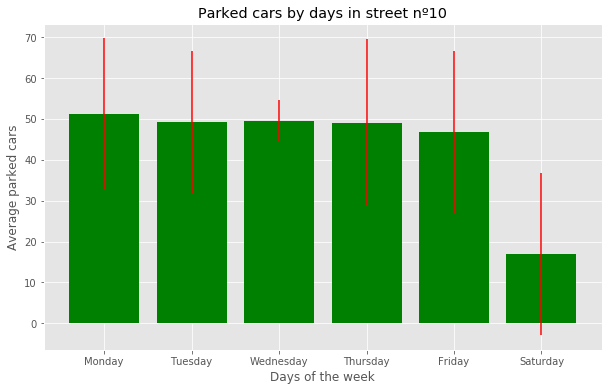

In [29]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,6)



#DESDE ACA LO UNICO QUE HAGO ES PARA QUE APAREZCAN ORDENADOS POR DIA
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = select_by_cuadra_mean['dia'].map(mapping)
select_by_cuadra_mean = select_by_cuadra_mean.iloc[key.argsort()].set_index('dia')

select_by_cuadra_mean = select_by_cuadra_mean.reset_index()
print(select_by_cuadra_mean.columns.values)
select_by_cuadra_mean = select_by_cuadra_mean.rename(columns = {0: 'Promedio cantidad estacionados'})
#HASTA ACA

daysOfTheWeek = select_by_cuadra_mean['dia'] # es lo mismo para el STD

x_pos = [i for i, _ in enumerate(daysOfTheWeek)]

plt.bar(x_pos, select_by_cuadra_mean['Promedio cantidad estacionados'], color='green')
plt.errorbar(x_pos, select_by_cuadra_mean['Promedio cantidad estacionados'], select_by_cuadra_std['Desvio cantidad estacionados'], linestyle='None', color='red')
plt.xlabel("Days of the week")
plt.ylabel("Average parked cars")
plt.title("Parked cars by days in street nº{}".format(cuadra))

plt.xticks(x_pos, daysOfTheWeek)

plt.show()


## Hago un grafico de linea con los datos de la cantidad de estacionados por cada hora (un grafico por cada dia)

    hora      dia  Promedio cantidad estacionados
20    10  Tuesday                        8.428571


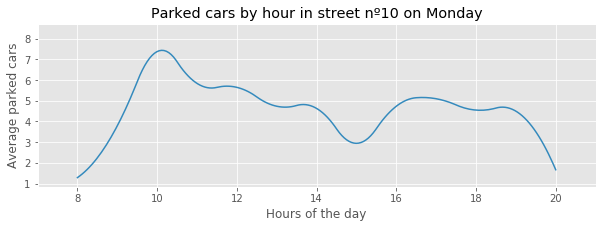

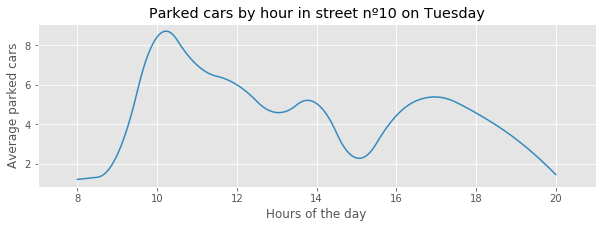

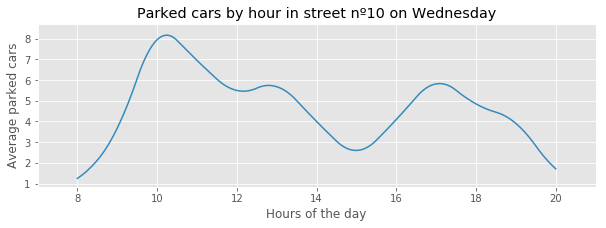

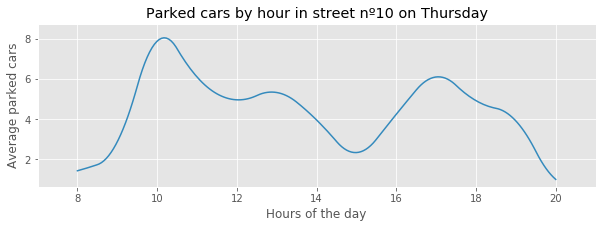

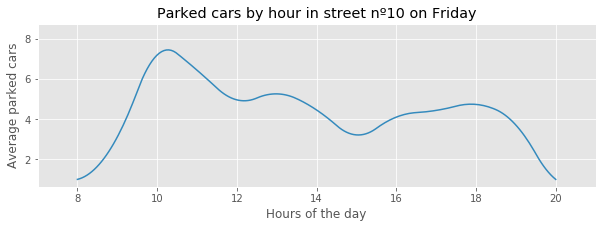

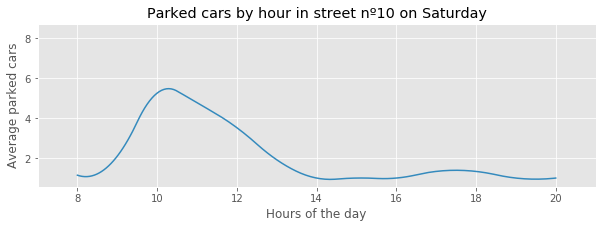

In [28]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

plt.rcParams['figure.figsize'] = (10,3)
time = np.linspace(mon_data.hora.min(),mon_data.hora.max(), 200) #300 represents number of points to make between T.min and T.max

def plotDayGraph( day_data,  day, max_data_for_fake_plot):   
    plt.xlabel("Hours of the day")
    plt.ylabel("Average parked cars")
    plt.title("Parked cars by hour in street nº{} on {}".format(cuadra,day))    
    plot_fake = make_interp_spline(max_data_for_fake_plot.hora, max_data_for_fake_plot['Promedio cantidad estacionados'], k=1)(time) #BSpline object
    plot = make_interp_spline(day_data.hora, day_data['Promedio cantidad estacionados'], k=2)(time) #BSpline object
    axes = plt.gca()
    axes.set_xlim([7,21])
    #axes.set_ylim([0, day_data['Promedio cantidad estacionados'].max()+1])
    plt.plot(time, plot_fake, alpha=0.0)
    plt.plot(time, plot)
    plt.show()

max_value = day_data.loc[day_data['Promedio cantidad estacionados'] == day_data['Promedio cantidad estacionados'].max()]
print(max_value)
if max_value.dia.iloc[0] == 'Monday':
    max_data_for_fake_plot = mon_data
elif max_value.dia.iloc[0] == 'Tuesday':
    max_data_for_fake_plot = tue_data
elif (max_value.dia.iloc[0] == 'Wednesday'):
    max_data_for_fake_plot = wed_data
elif (max_value.dia.iloc[0] == 'Thursday'):
    max_data_for_fake_plot = thur_data
elif (max_value.dia.iloc[0] == 'Friday'):
    max_data_for_fake_plot = fri_data
elif (max_value.dia.iloc[0] == 'Saturday'):
    max_data_for_fake_plot = sat_data
#elif (max_value.dia.iloc[0] == 'Sunday'):
#    max_data_for_fake_plot = sun_data
    
    
    
plotDayGraph(mon_data,'Monday', max_data_for_fake_plot)
plotDayGraph(tue_data,'Tuesday', max_data_for_fake_plot)
plotDayGraph(wed_data,'Wednesday', max_data_for_fake_plot)
plotDayGraph(thur_data,'Thursday', max_data_for_fake_plot)
plotDayGraph(fri_data,'Friday', max_data_for_fake_plot)
plotDayGraph(sat_data,'Saturday', max_data_for_fake_plot)
#plotDayGraph(sun_data,'Sunday', max_data_for_fake_plot)

# Predigo las cuadras con mas probabilidad de encontrar estacionamiento dada una hora y un dia.